# Visualisierung der Frequencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Damit **freq** importiert werden kann, muss der Order in dem _freq.py_ liegt zum Pfad hinzugefügt werden.
Wenn die Datei im selben Order liegt, ist dies überflüssig.

In [2]:
import sys
sys.path.append("./")
import freq

# Laden der benötigten Daten

Zu Beginn werden alle mit **get_contacts.py** berechneten Frequencies eingeladen. 
Die Frequencies wurden mit **get_dynamic_contacts.py** und **get_contact_frequencies.py** berechnet. 

Es wurde nur eine Auswahl des Interaktiontyps vorgenommen, aber keine Selektion von bestimmten Resten.

In [3]:
all_freq_ab1 = freq.Frequency.from_tsv(
    filename = '/home/jak/Documents/ba_project/covd21-c8/contacts/wt/freq.tsv', 
    interaction = 'vdw', 
    name = 'Wildtype'
)

_all_freq_ab1_ ist nun ein **Frequency**-Objekt, welches ein paar Attribute und Methoden besitzt.

In [4]:
all_freq_ab1.df

,res 1,number 1,res 2,number 2,contact_frequency
0,PRO,386,SER,163,0.583
1,PHE,385,SER,177,0.930
2,PHE,117,SER,351,0.265
3,TYR,317,TYR,92,0.965
4,PRO,342,SER,122,0.805
...,...,...,...,...,...
358,LYS,258,LYS,40,0.000
359,GLU,1,GLU,303,0.000
360,ILE,2,LEU,260,0.000
361,GLY,257,ILE,2,0.000


In [5]:
all_freq_ab1.interaction

'vdw'

In [6]:
all_freq_ab1.selection

In [7]:
all_freq_ab1.filename

'/home/jak/Documents/ba_project/covd21-c8/contacts/wt/freq.tsv'

In [8]:
all_freq_ab1.info()

System:			Wildtype
Interactiontype:	vdw
Frequencies from:	/home/jak/Documents/ba_project/covd21-c8/contacts/wt/freq.tsv


# Auswahl von Kontakten

Aus diesem **Frequency**-Objekt kann mit _.select( )_ eine Auswahl von Residues gewählt werden. Diese Methode gibt ein neues **Frequency**-Objekt zurück.

Die Auswahl wird als Tuple/Liste im Stil **( _von_, _bis_ )** angegeben. Optional kann auch eine zweite Auswahl getroffen werden.

In [9]:
some_freq_ab1 = all_freq_ab1.select((0,215), (313,321))
some_freq_ab1.df.head()

,res 1,number 1,res 2,number 2,contact_frequency
3,TYR,317,TYR,92,0.965
5,LEU,47,TYR,318,0.885
22,TYR,318,TYR,50,0.937
26,PHE,319,TYR,37,0.973
29,ARG,97,ASP,316,0.555


Der selbe Prozess kann für eine zweite Trajektorie durchgeführt werden.

In [10]:
all_freq_ab2 = freq.Frequency.from_tsv(
    filename = '/home/jak/Documents/ba_project/covd21-c8/contacts/mu/freq.tsv', 
    interaction = 'vdw', 
    name = 'Mashup'
)
some_freq_ab2 = all_freq_ab2.select((0,215), (313,321))
some_freq_ab2.df.head()

,res 1,number 1,res 2,number 2,contact_frequency
0,PHE,319,TYR,36,0.496
1,GLN,55,TYR,318,0.664
3,ASP,320,GLN,55,0.234
10,TYR,318,TYR,49,0.690
15,GLN,89,PHE,319,0.033


# Zusammenfügen verschiedener Frequency Daten

Unter _Frequency.df_ sind die eingeladenen DataFrames gespeichert. Mit _df.set_index(keys=[...])_ werden die ausgewählten Spalten als Index gesetzt.

Diese DataFrames mit allen Spalten bis auf _contact_frequency_ als Index werden per **pd.concat()** zusammengefügt. Mit _keys=[...]_ werden die Namen gesetzt.

Mit **pd.concat()** werden die zwei DataFrames zusammengefügt.

In [11]:
df_concat = pd.concat(
    [some_freq_ab1.df.set_index(keys=['res 1', 'number 1', 'res 2', 'number 2']),
    some_freq_ab2.df.set_index(keys=['res 1', 'number 1', 'res 2', 'number 2'])],
    keys = ['linker name', 'rechter name']
)
df_concat

contact_frequency
             res 1 number 1 res 2 number 2                   
linker name  TYR   317      TYR   92                    0.965
             LEU   47       TYR   318                   0.885
             TYR   318      TYR   50                    0.937
             PHE   319      TYR   37                    0.973
             ARG   97       ASP   316                   0.555
...                                                       ...
rechter name ASP   92       TYR   318                   0.002
             LEU   91       TRP   314                   0.000
             ASP   92       PHE   319                   0.000
             TRP   314      VAL   58                    0.000
             LYS   45       TRP   314                   0.002

[159 rows x 1 columns]

Mit _.unstack_ wird der ausgewählte Index in eine Spalte umgewandelt. _level=-5_ entspricht dem 5ten Index wenn man von rechts nach links zählt.

In [12]:
merged_df = df_concat.unstack(level=-5, fill_value=0)
merged_df

contact_frequency             
                                    linker name rechter name
res 1 number 1 res 2 number 2                               
ALA   34       TYR   317                  0.000        0.008
                     318                  0.000        0.009
      35       TYR   317                  0.000        0.000
                     318                  0.183        0.000
      43       ASP   320                  0.000        0.000
...                                         ...          ...
TYR   318      TYR   37                   0.708        0.000
                     49                   0.000        0.690
                     50                   0.937        0.000
                     92                   0.575        0.000
               VAL   58                   0.000        0.006

[154 rows x 2 columns]

Wenn erwünscht können die Werte sortiert werden. Hier werden sie absteigend nach den Residue-Nummern sortiert.

In [13]:
# sortieren der Werte nach dem Wert der contact_frequency
# merged_df.sort_values(by = [('contact_frequency', 'linker name'),
#                             ('contact_frequency', 'rechter name')],
#                       ascending=False
#)

# sortieren der Werte nach der Residue-Nummer
merged_df = merged_df.sort_index(level=['number 1', 'number 2'])
merged_df

contact_frequency             
                                    linker name rechter name
res 1 number 1 res 2 number 2                               
SER   30       TYR   317                  0.000        0.000
      31       TYR   317                  0.000        0.005
                     318                  0.000        0.002
      32       TYR   317                  0.004        0.000
LEU   33       TYR   318                  0.000        0.001
...                                         ...          ...
ASP   320      TYR   50                   0.000        0.000
               GLN   55                   0.000        0.234
               SER   56                   0.000        0.040
               GLY   57                   0.000        0.001
               THR   57                   0.000        0.000

[154 rows x 2 columns]

# Labeling verändern

Aus den 4 Indizes werden 2 Indizes erstellt. Die Formatierung kann wie erwünscht erfolgen.

Wenn zb. _One-Letter-Code_ erwünscht ist, können die _Three-Letter-Code_ Residue-Namen mit dem Dictionary *three2one* umgewandelt werden. *three2one* kann natürlich erweitert werden, sollte eine Aminosäure bzw. ein Code fehlen.

Ebenfalls wird das Label _contact_frequency_ entfernt, da es sonst beim Plotten in den x-Achsen-Labels vorkommt.

In [14]:
print(freq.three2one)

{'CYS': 'C', 'CYX': 'C', 'ASP': 'D', 'ASH': 'D+', 'ASN': 'N', 'GLN': 'Q', 'GLH': 'E+', 'GLU': 'E', 'LYS': 'K', 'LYN': 'K+', 'HIS': 'H', 'HIE': 'HIE', 'HID': 'HID', 'HIP': 'HIP', 'SER': 'S', 'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'GLY': 'G', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 'ALA': 'A', 'VAL': 'V', 'TYR': 'Y', 'MET': 'M'}


In [15]:
# Beispiel wie zb. one_letter_code labels erstellt werden können
pd.MultiIndex.from_arrays(
    zip(*[(f"{freq.three2one[res1]}{num1:03}", f"{freq.three2one[res2]}{num2:03}") for res1, num1, res2, num2 in merged_df.index])
)

MultiIndex([('S030', 'Y317'),
            ('S031', 'Y317'),
            ('S031', 'Y318'),
            ('S032', 'Y317'),
            ('L033', 'Y318'),
            ('A034', 'Y317'),
            ('A034', 'Y318'),
            ('A035', 'Y317'),
            ('A035', 'Y318'),
            ('K042', 'Y321'),
            ...
            ('D320', 'Y036'),
            ('D320', 'P044'),
            ('D320', 'K045'),
            ('D320', 'L046'),
            ('D320', 'L047'),
            ('D320', 'Y050'),
            ('D320', 'Q055'),
            ('D320', 'S056'),
            ('D320', 'G057'),
            ('D320', 'T057')],
           length=154)

In [16]:
# aus 4 mach 2
# Beispiel für neuen Index
merged_df.index = pd.MultiIndex.from_arrays(
    zip(*[(f"{res1}{num1:03}", f"{res2}{num2:03}") for res1, num1, res2, num2 in merged_df.index])
)
# entfernen von contact_frequency - label
merged_df.columns = [name for _, name in merged_df.columns]

merged_df

linker name  rechter name
SER030 TYR317        0.000         0.000
SER031 TYR317        0.000         0.005
       TYR318        0.000         0.002
SER032 TYR317        0.004         0.000
LEU033 TYR318        0.000         0.001
...                    ...           ...
ASP320 TYR050        0.000         0.000
       GLN055        0.000         0.234
       SER056        0.000         0.040
       GLY057        0.000         0.001
       THR057        0.000         0.000

[154 rows x 2 columns]

# Absoluter und relativer cutoff
Die Daten können wie gezeigt zugeschnitten werden.

In [17]:
cutoff = 0.6

#absoluter cutoff
merged_df[(merged_df > cutoff).any(axis=1)]

linker name  rechter name
LEU046 TYR318        0.000         0.627
LEU047 TYR318        0.885         0.001
GLN055 TYR318        0.000         0.664
ARG097 ASP313        0.673         0.000
       TYR317        0.738         0.000
       PHE319        0.632         0.000
TYR317 TYR092        0.965         0.000
TYR318 TYR037        0.708         0.000
       TYR049        0.000         0.690
       TYR050        0.937         0.000
PHE319 TYR037        0.973         0.000
       PHE099        0.693         0.028

In [18]:
# relativ
merged_df[abs(merged_df['linker name']-merged_df['rechter name']) > cutoff]

linker name  rechter name
LEU046 TYR318        0.000         0.627
LEU047 TYR318        0.885         0.001
GLN055 TYR318        0.000         0.664
ARG097 ASP313        0.673         0.000
       TYR317        0.738         0.000
       PHE319        0.632         0.000
TYR317 TYR092        0.965         0.000
TYR318 TYR037        0.708         0.000
       TYR049        0.000         0.690
       TYR050        0.937         0.000
PHE319 TYR037        0.973         0.000
       PHE099        0.693         0.028

In [19]:
# relativ wenn zb. mehr als 2 Frequency-DataFrames verglichen werden.
merged_cut_df = merged_df[merged_df.max(axis=1)-merged_df.min(axis=1) > cutoff]
merged_cut_df

linker name  rechter name
LEU046 TYR318        0.000         0.627
LEU047 TYR318        0.885         0.001
GLN055 TYR318        0.000         0.664
ARG097 ASP313        0.673         0.000
       TYR317        0.738         0.000
       PHE319        0.632         0.000
TYR317 TYR092        0.965         0.000
TYR318 TYR037        0.708         0.000
       TYR049        0.000         0.690
       TYR050        0.937         0.000
PHE319 TYR037        0.973         0.000
       PHE099        0.693         0.028

# Visualisierung der Frequencies

Für die Visualisierung der zusammengefügten Frequencies kann entweder _Fingerprints_ (basierend auf seaborn.clustermap) oder _Heatmap_ (basierend auf seaborn.heatmap) verwendet werden.

Details wie zb. Labels können eingestellt werden, in dem man den Index des _merged_df_ ändert.

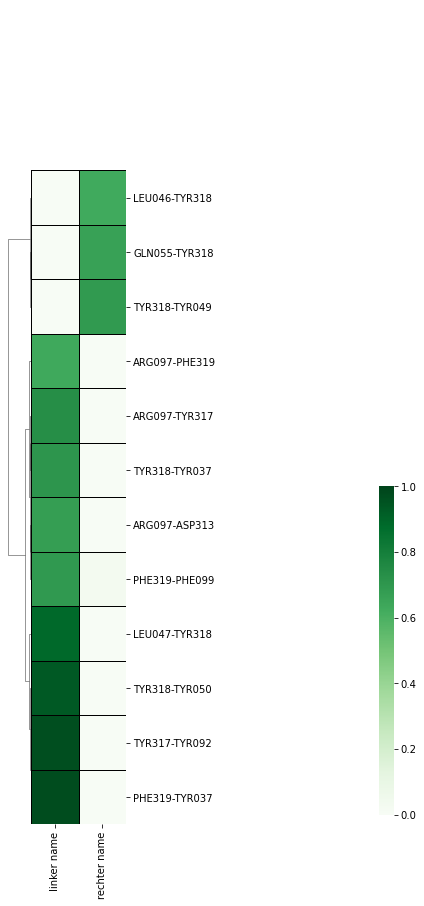

In [41]:
f = freq.fingerprint(
data = merged_cut_df, 
    cmap = 'Greens',
    y_size = 2, cbar_pos=(2.6, 0.05, 0.1, 0.38) #(x, y, dx, dy)
)

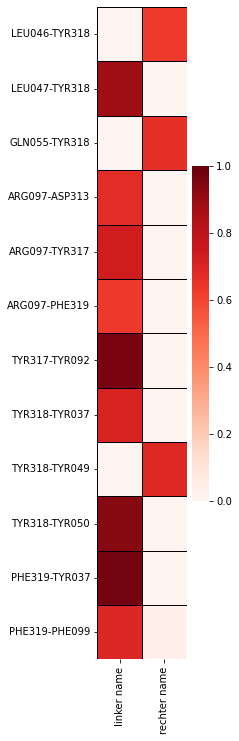

In [31]:
f = freq.heatmap(
    data = merged_cut_df, 
    cmap = 'Reds', 
    y_size = 2,
)

Die Funktionen **fingerprint**, **heatmap** und **merge** sowie die **Frequency**-Klasse befinden sich in der _freq.py_ Datei und können natürlich angepasst werden.

# Vorgehensweise bei mehr als zwei zu vergleichenden Datensätzen

In [22]:
some_freq_ab3 = some_freq_ab2

In [23]:
df_concat = pd.concat(
    [
        some_freq_ab1.df.set_index(keys=['res 1', 'number 1', 'res 2', 'number 2']),
        some_freq_ab2.df.set_index(keys=['res 1', 'number 1', 'res 2', 'number 2']),
        some_freq_ab3.df.set_index(keys=['res 1', 'number 1', 'res 2', 'number 2'])
    ],
    keys = ['linker name', 'mittlerer name', 'rechter name']
)

merged_df = df_concat.unstack(level=-5, fill_value=0)

merged_df = merged_df.sort_index(level=['number 1', 'number 2'])

merged_df.index = pd.MultiIndex.from_arrays(
    zip(*[(f"{res1}{num1:03}", f"{res2}{num2:03}") for res1, num1, res2, num2 in merged_df.index])
)
merged_df.columns = [name for _, name in merged_df.columns]

cutoff = 0.6
merged_cut_df_expanded = merged_df[merged_df.max(axis=1)-merged_df.min(axis=1) > cutoff]
merged_cut_df_expanded

linker name  mittlerer name  rechter name
LEU046 TYR318        0.000           0.627         0.627
LEU047 TYR318        0.885           0.001         0.001
GLN055 TYR318        0.000           0.664         0.664
ARG097 ASP313        0.673           0.000         0.000
       TYR317        0.738           0.000         0.000
       PHE319        0.632           0.000         0.000
TYR317 TYR092        0.965           0.000         0.000
TYR318 TYR037        0.708           0.000         0.000
       TYR049        0.000           0.690         0.690
       TYR050        0.937           0.000         0.000
PHE319 TYR037        0.973           0.000         0.000
       PHE099        0.693           0.028         0.028

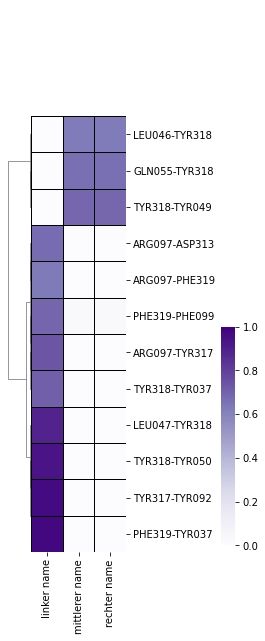

In [25]:
f = freq.fingerprint(
    data = merged_cut_df_expanded, 
    cmap = 'Purples', 
    y_size = 2, 
)

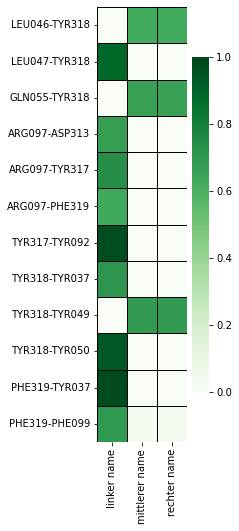

In [32]:
f = freq.heatmap(
    data = merged_cut_df_expanded, 
    cmap = 'Greens', 
    y_size = 2,
)

# fancy flareplots

Der Code für die Erstellung der Flare-Plots kann beliebig erweitert und angepasst werden. Die Methode soll eher aufzeigen, wie ein Flareplot mit *Matplotlib* realisiert werden könnte.

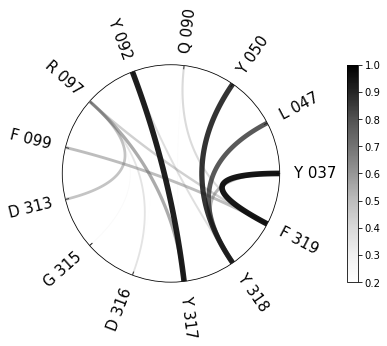

In [26]:
fig = some_freq_ab1.flare(cmap='Greys', fontsize=15, linewidth=6, cbar=True, cutoff=0.2)

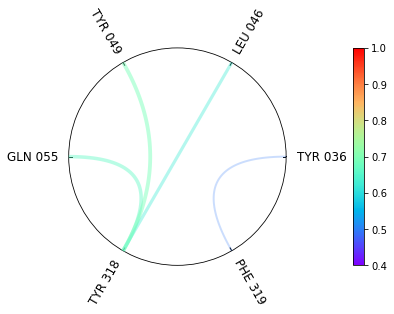

In [27]:
fig = some_freq_ab2.flare(cmap='rainbow', fontsize=12, linewidth=8, one_letter=False, cbar=True, cutoff=0.4)